In [1]:
import numpy as np


## Sigmoid

- Forward pass


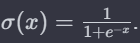

- Backward pass


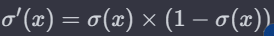

In [2]:
# Forward pass
def sigmoid(x):
    return 1/1 + np.exp(-x)


def d_sigmoid(x):
    return sigmoid * (1- sigmoid)

## Relu

In [13]:
# In Python, and specifically in NumPy, 
# when you have an array or a sequence of boolean values, the astype function is used to convert these boolean values into a different data type.
def relu(x):
    return x * (x >= 0), (x > 0).astype(float)



## Softmax

In [ ]:
# Softmax with derivative
def softmax(vec):
    s = np.exp(vec) / np.exp(vec).sum()
    return s  #, s * (np.eye(s.size) - s.reshape(-1, 1))




## Inverted Dropout
This implementation uses “inverted dropout”, which means that the dropout mask is scaled by 1 / (1 - dropout_rate). This ensures that the expected sum of A remains the same as if no dropout was applied, allowing us to use the same forward pass during testing (with dropout_rate = 0). This is why it’s called “inverted” dropout: instead of scaling up during testing (which is what the original dropout does), we scale down during training. This is generally more convenient and efficient.

In [ ]:
def inverted_dropout(x, dropout_rate):

      dropout_mask = (np.random.rand(*x.shape) < (1 - dropout_rate)) / (1 - dropout_rate)

      x *= dropout_mask

      return x



## Neural Network

You should implement a fully-connected NN class where with number of 
hidden layers, units, activation functions can be changed. In addition, you 
can add dropout or regularizer (L1 or L2).  
Report the parameters used 
(update rule, learning rate, decay, epochs, batch size) and include the plots 
in your report

In [1]:
class NeuralNetwork:

    def __init__(self, layers_sizes ,l1,l2, activation_function, dropout_rate):


        self.layers_sizes = layers_sizes
        self.num_layers = len(layers_sizes)
        self.l1 = l1
        self.l2 = l2
        self.activation_function = activation_function
        self.dropout_rate = dropout_rate
        self.parameters = self.initialise_parameters()




        def initialise_parameters(self):

            params = {}
            for l in range(1, self.num_layers):
                
                params[f"W{l}"] = np.random.randn(self.layers_sizes, 1-self.layers_sizes)
                params[f"b{l}"]= np.zeros(self.layers_sizes[l],1)

            return params



        
        def inverted_dropout(self, Zl):
            dropout_mask = (np.random.rand(*Zl.shape) < self.dropout_rate) / (1 - self.dropout_rate)
            return dropout_mask
    
        def forward_pass(self,X, training=True):
            self.dropout_masks = {}
            cache = {"A0":X}
            for l in range(1, self.num_layers):
                Wl, bl = self.parameters[f"W{l}"], self.parameters[f"b{l}"]
                Al_prev = cache[f"A{l - 1}"]
                Zl = np.dot(Wl, Al_prev) + bl  


                if training and l < self.num_layers - 1:
                    dropout_mask = self.inverted_dropout(Zl)
                    self.dropout_masks[f"mask{l}"] = dropout_mask
                    Zl *= dropout_mask


                Al = self.activation_function(Z1)[0]
                

                # Store weighted sum and activation
                cache[f"Z{l}"] = Zl
                cache[f"A{l}"] = Al

                return Al, cache
            

        def backward_pass(self,A, Y, cache):

            m = Y.shape[1] 


            gradients = {}

            
            dz = A - Y



            for l in reversed(range(1,self.num_layers)):

                Al_prev = cache[f"A{l - 1}"]
                Wl = self.parameters[f"W{l}"]


                
                # Apply dropout during backpropagation
                if f"mask{l}" in self.dropout_masks:
                    dZ *= self.dropout_masks[f"mask{l}"]



                    # Add weight and bias gradients to dictionary
                gradients[f"dW{l}"] = np.dot(dZ, Al_prev.T) / m    #(m = normalization or averaging the gradients across the mini-batch or the entire dataset.)
                gradients[f"db{l}"] = np.sum(dZ, axis = 1, keepdims = True) / m
                
                # Compute derivative using activation function
                dZ = np.dot(Wl.T, dZ) * self.activation_function(Al_prev)[1]

            return gradients
            






    
            





                      




                





        pass

In [3]:
import numpy as np
np.log(0)

C:\Users\local_adfx757\Temp\ipykernel_5152\4018246832.py:2: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [22]:

A = np.array([0.00000000000000000001, 0.1, 1.1,1.5])
np.clip(A, 1e-15, 1-1e-15)

array([1.e-15, 1.e-01, 1.e+00, 1.e+00])

In [68]:
a = np.array([[10, 15, 12,19],
       [13, 14, 15,16],[16, 15, 12,19]])

(np.argmax(a, axis=1))

array([3, 3, 3], dtype=int64)

In [53]:
0.05 * np.sign(-5)

-0.05

In [54]:
-2/10

-0.2